# import libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

# prepare data

In [2]:
labeled_images = pd.read_csv('data/train.csv')

In [52]:
images = labeled_images.iloc[:,1:]
images.shape, images.ndim

((42000, 784), 2)

In [49]:
images.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
labels = labeled_images.iloc[:,:1]
labels.shape, labels.ndim

((42000, 1), 2)

In [51]:
labels.head()

,label
0,1
1,0
2,1
3,4
4,0


## prepare training and test set

In [54]:
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

## view the image

Text(0.5, 1.0, '2')

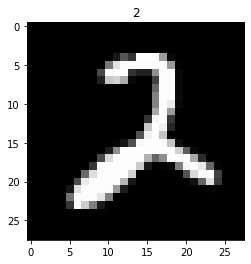

In [55]:
i = 5
img = train_images.iloc[i].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

(array([645.,   9.,  11.,   6.,   8.,   6.,   8.,   6.,  10.,  75.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

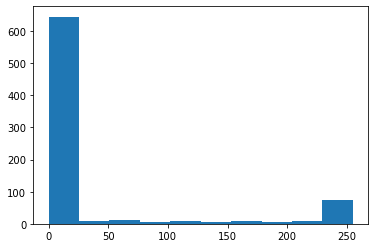

In [56]:
plt.hist(train_images.iloc[i])

# model

In [57]:
clf = svm.SVC(decision_function_shape='ovr')
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

0.9747619047619047

# testing

In [58]:
test_data = pd.read_csv('data/test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
results = clf.predict(test_data)

In [62]:
len(results)

28000

# labeling the test data

In [63]:
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']

In [64]:
df.head(10)

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3
6,7
7,0
8,3
9,0


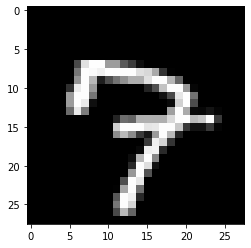

In [65]:
i = 5
img_t = test_data.iloc[i].to_numpy()
img_t = img_t.reshape((28,28))
plt.imshow(img_t,cmap='gray')

In [66]:
df.to_csv('results.csv', header=True)